# Introduction to Data Science

## Collecting, Exploring and Cleaning Data

## Common Data Formats (in Data Science)

* CSV
* JSON
* Plain Text
* HTML

### CSV: Comma Separated Values

<img src = "images/csv.png">

In [20]:
import pandas as pd

df = pd.read_csv('../../datasets/test.csv')

# for more customization you might want to try python's csv module
df

,x,y
0,1,6
1,2,7
2,3,8
3,4,9
4,5,10


### JSON: JavaScript Object Notation

<img src = "images/json.png" width = "30%" height = "30%">

In [63]:
import json

data = dict()

with open('datasets/test.json') as f:
    data=json.load(f)
data

{'firstName': 'John',
 'lastName': 'Smith',
 'isAlive': True,
 'age': 27,
 'address': {'streetAddress': '21 2nd Street',
  'city': 'New York',
  'state': 'NY',
  'postalCode': '10021-3100'},
 'phoneNumbers': [{'type': 'home', 'number': '212 555-1234'},
  {'type': 'office', 'number': '646 555-4567'},
  {'type': 'mobile', 'number': '123 456-7890'}],
 'children': [],
 'spouse': None}

### Plain Text

<img src = "images/txt.png">

In [64]:
with open('datasets/test.txt') as f:
    lines = f.readlines(1000)

In [65]:
lines

['If you should go skating\n',
 'On the thin ice of modern life\n',
 'Dragging behind you the silent reproach\n',
 'Of a million tear-stained eyes\n',
 "Don't be…"]

### HTML

<img src = "images/html.png">

In [8]:
# see the codecs module and the BeautifulSoup library for Web Scraping, in recitation.

# Collecting Data

* Where do(es) data come from?

* Web Scraping

* Small Data, Big Data

* Common Data Formats

## Where do(es) data come from?

* Then: Manual Curation
* Now: Automatic Curation

### Then: Manual Curation (I)


If your parents have not taken note, anywhere, of how tall you were at the age of 1 - we may never be able to extract this information.

<img src = "images/height_marks.jpg" width = "80%" height = "80%">

### Then: Manual Curation (II)

If the US government had not seen fit to estimate and record the level of alcohol consumption of its citizens, we would never have known.

<img src = "images/alcohol-consumption-per-person-us.png" width = "80%" height = "80%">

### Now: Automatic Curation (I)

Have you ever opened up an Internet browser, searched for "Amazon", clicked on [amazon.com](amazon.com) and scrolled around to check the price of a T-shirt? You don't have to be logged in. You don't have to buy. You are data.

<img src = "images/you_are_data.png">

### Now: Automatic Curation (II)
<img src = "images/cambridge.png">

## Web Scraping

* Public APIs
* Beautiful Soup

### Public APIs (I)

It's not all bad news. You also have the power to automatically curate data, yourself.

<img src = "images/google_trends01.png">

### Public APIs (II)

<img src = "images/google_trends02.png">

### Beautiful Soup

You may not even need an API.  The following code scrapes the Wikipedia page for the [Beatles discography](https://en.wikipedia.org/wiki/The_Beatles_discography) and creates a table, out of "thin air". See more advanced examples in recitation.

In [1]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd

url = "https://en.wikipedia.org/wiki/The_Beatles_discography"
r = requests.get(url)
soup = BeautifulSoup(r.content)

In [2]:
def get_release_details(release_col):
    release_date = None
    release_label = None
    if release_col is not None:
        release_list = release_col.find('ul')
        if release_list is not None:
            release_list_elements = release_list.find_all('li')
            for element in release_list_elements:
                element_text = element.get_text()
                if element_text.startswith('Released: '):
                    release_date = re.search('Released: ([0-9a-zA-Z ]+)',\
                                             element_text).group(1)
                if element_text.startswith('Label: '):
                    release_label = re.search('Label: ([0-9a-zA-Z,\(\) ]+)', \
                                              element_text).group(1)
    return release_date, release_label

In [66]:
albums = dict()
id = 0
albums[id] = dict()
tables = soup.find_all('table')
for table in tables:
    caption = table.find('caption')
    if caption is not None:
        header = caption.get_text()
        if re.match(re.compile('^List of(.+?)albums'), header):
            rows = table.find_all('tr')
            for row in rows:
                title_col = row.find('th')
                if title_col is not None and 'scope' in title_col.attrs and\
                title_col.attrs['scope'] == 'row':            
                    title_cell = title_col.find('a')
                    if title_cell is not None and title_cell.attrs is not None and\
                    'title' in title_cell.attrs:
                        albums[id]['name'] = title_cell.attrs['title']
                        release_col = row.find('td')
                        release_date, release_label = get_release_details(release_col)
                        if release_date is not None or release_label is not None:
                            albums[id]['release_date'] = release_date
                            albums[id]['release_label'] = release_label
                            id += 1
                            albums[id] = dict()

In [71]:
albums_df = pd.DataFrame.from_dict(albums, orient ='index')
albums_df[1::10]

,name,release_date,release_label
1,Please Please Me,22 March 1963,Parlophone (UK)
11,Beatles '65,15 December 1964,Capitol (US)
21,Abbey Road,26 September 1969,Apple
31,The Beatles vs the Four Seasons,October 1964,Vee
41,Hey Jude (Beatles album),26 February 1970,"Parlophone (UK), Capitol (US)"
51,Rarities (Beatles compilations),24 March 1980,Capitol (US)
61,Past Masters,24 October 1988,"Parlophone (UK), Capitol (US)"
71,Tomorrow Never Knows (Beatles album),24 July 2012,"Apple, EMI"


## Small Data, Big Data

* What's in a name?
* Web Data is Big Data

### What's in a name? (I)

These definitions are constantly changing.

* "Everything processed in Excel is small data." ([Rufus Pollock, The Guardian](https://www.theguardian.com/news/datablog/2013/apr/25/forget-big-data-small-data-revolution))
* "[Big Data] is data so large it does not fit in main memory" (Leskovec et al., Mining of Massive Datasets)

Or maybe we should define the size of our data according to how easy it is to process and understand it?


* "[Small Data is] data that has small enough size for human comprehension." ([jWork.ORG](jWork.ORG))
* "data sets that are too large or complex for traditional data-processing application software to adequately deal with" ([Wikipedia](https://en.wikipedia.org/wiki/Big_data))

### What's in a name? (II)

The actual definition should probably merge both of the above.

* Excel can fit 1M rows, 16K columns of double numbers. Try loading a matrix such as this into Matlab, Python or R, and invert it - you can't. So isn't that Big?
* Facebook generates 4 Petabytes of data, daily. That's 4K Terabytes or 4M Gigabytes. ([Brandwatch.com](https://www.brandwatch.com/blog/47-facebook-statistics/)) But a Facebook Data Scientist in daily life typically needs only a copy of some of these data, which fits in her PC. Isn't that small?



### Web data is Big Data

We can all agree *this* is big: ([Domo.com](https://www.domo.com/learn/data-never-sleeps-5))
    
<img src = "images/domo.png" width = "50%" height = "50%">

# Exploring Data

* Basic Plots

* Summary Statistics

* Advanced (Yet Tamed) Visualization

* Visualization Bonanza

## Basic Plots

* Box plot
* Swarm plot
* Histogram
* Density plot
* Scatter plot

### Boxplot

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
X = np.random.chisquare(5, 1000)

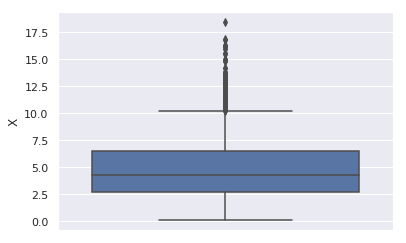

In [11]:
sns.boxplot(X, orient = 'v', whis=1)
plt.ylabel('X')
plt.show()

### Swarmplot

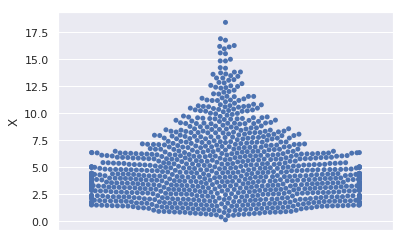

In [18]:
sns.swarmplot(X, orient = 'v')
plt.ylabel('X')
plt.show()

### Histogram

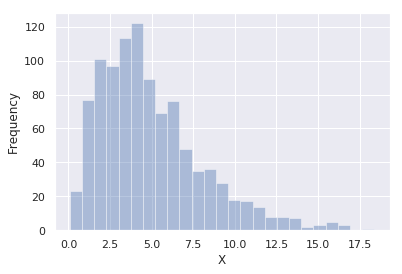

In [20]:
sns.distplot(X, kde = False)
plt.ylabel('Frequency')
plt.xlabel('X')
plt.show()

### Density Plot

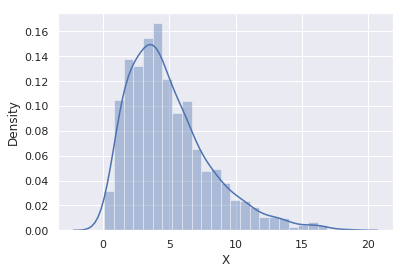

In [22]:
sns.distplot(X, hist = True)
plt.ylabel('Density')
plt.xlabel('X')
plt.show()

## Density plot: kernel density estimation / convolution

The way to get a smooth estimate of the distribution in density plot is by defining a kernel which "smoothes" the data. Mathematically we define a kernel weight function $w: \mathbb R \rightarrow \mathbb R^+$ as:  
1. Non-negative, symmetric: $w(x)\geq 0, w(x)=w(-x)$
2. Integrates to 1: $\int_{\mathbb R} w(x) dx = 1$

And then the density kernel estimate is:
$$ J(x) = 1/n  \cdot \sum_{i=1}^n w(x_i-x).$$
Nice property:
$$\int_{\mathbb R} J(x) dx = 1.$$

* Wide $w$: smooth estimate, but it may not reflect the real data, 
* Narrow $w$: very non-smooth description. 

For example smoothing this same dataset with too narrow or too wide window:  



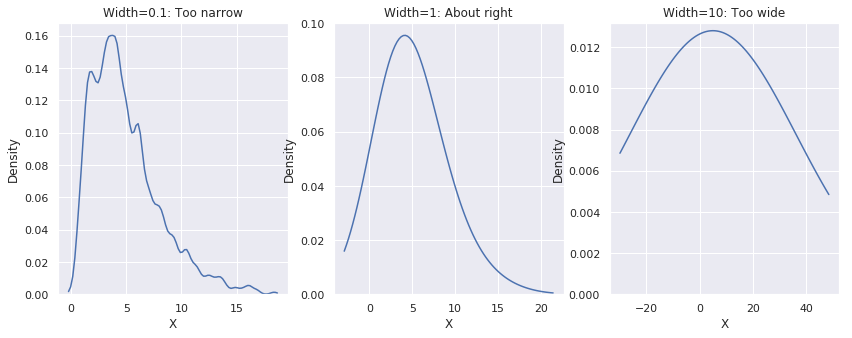

In [23]:
plt.figure(figsize =(14, 5))
plt.subplot(1, 3, 1)
sns.kdeplot(X, bw=0.1)
plt.ylabel('Density')
plt.xlabel('X')
plt.title('Width=0.1: Too narrow')
plt.subplot(1, 3, 2)
sns.kdeplot(X, bw=1)
plt.ylabel('Density')
plt.xlabel('X')
plt.title('Width=1: About right')
plt.subplot(1, 3, 3)
sns.kdeplot(X, bw=10)
plt.ylabel('Density')
plt.xlabel('X')
plt.title('Width=10: Too wide')
plt.show()

### Scatterplot

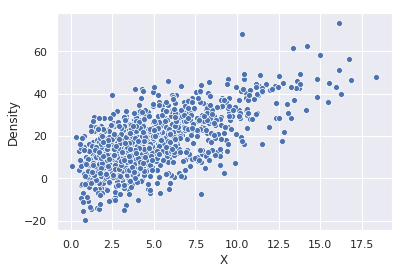

In [24]:
b0 = 2
b1 = 3
Y = X * b1 + b0 + np.random.normal(0, 10, 1000)
sns.scatterplot(X, Y)
plt.ylabel('Density')
plt.xlabel('X')
plt.show()

## What can we learn from simple plots? 

### Look at outliers: 
<img src = "images/Outliers.jpg" width = "40%" height = "40%">

### See the shape and tail direction:  
Age at heart attack (left) and cost of hospitalization (right)
<img src = "images/Skew.jpg" width = "70%" height = "70%">


## Summary Statistics

* Location
* Dispersion
* Shape

### Location

"Where is this X located? Where is the central mass?"

* Mean of empirical distribution (=average): $$Mean(X) = \frac{1}{N}\sum\limits_{i=1}^N X_i$$
* Median: $$Med(X) = m \mbox{ s.t. } P(X \leq m) = P(X \geq m) = 0.5$$
* Mode: $$Mode(X) = \mbox{ Most frequent value  in a dataset}$$

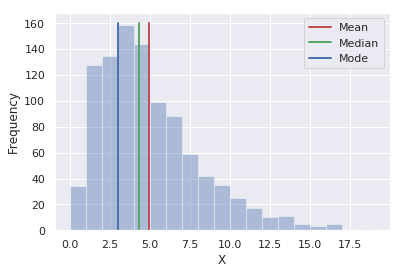

In [25]:
mean = np.mean(X)
median = np.median(X)
hist, _ = np.histogram(X, bins=range(20))
mode = list(range(20))[hist.argsort()[::-1][0]]
sns.distplot(X, bins = range(20), kde = False)
plt.plot([mean, mean], [0, 160], linewidth=2, color='r')
plt.plot([median, median], [0, 160], linewidth=2, color='g')
plt.plot([mode, mode], [0, 160], linewidth=2, color='b')
plt.legend({'Mean':mean,'Median':median,'Mode':mode})
plt.xlabel('X')
plt.ylabel('Frequency')
plt.show()

### Dispersion

"Is X widely spread out? Does it concentrate narrowly around the mean?"

* Quantiles/Percentiles: $$Q(X, q) = v \mbox{ s.t. } P(X \leq v) = 1-P(X \geq v) = q$$
* Range: $$Range(X) = Max(X) - Min(X)$$
* Inter-Quartile-Range:$$IQR(X) = Q(X, 0.75) - Q(X, 0.25)$$
* (Empirical) Variance: $$Var(X) = \frac{1}{N}\sum\limits_{i=1}^N (X_i - Mean(X))^2$$
* Standard Deviation: $$STD(X) = \sqrt{Var(X)}$$

In [26]:
print(f'90th percentile: {np.percentile(X, 90)}')
print(f'Range: {np.max(X) - np.min(X)}')
print(f'IQR: {np.percentile(X, 75) - np.percentile(X, 25)}')
print(f'Variance: {np.var(X)}')
print(f'Standard Deviation: {np.std(X)}')

90th percentile: 9.209980916526284
Range: 18.30069486642623
IQR: 3.759531945031867
Variance: 9.608637482778024
Standard Deviation: 3.099780231367705


### Shape

"Is X symmetric or not? How 'tailed' is it?"

* Skewness: $$Skew(X) = \frac{1}{N}\frac{\sum\limits_{i=1}^N (X_i - Mean(X))^3}{STD(X)^3}$$


In [27]:
from scipy import stats

print(f'Skewness: {stats.skew(X)}')

Skewness: 1.1435183346184905


## Advanced Visualization

* Minard's Napoleon March
* Heatmaps
* Spotify: Total Eclipse of the Heart
* Chernoff Faces
* Ridges plot (a.k.a Joy plot)
* Gapminder World

### Minard's Napoleon March

<img src = "images/minard.png">

### Heatmaps

[source](https://towardsdatascience.com/exploring-infections-through-data-interactive-visualisation-of-measles-in-the-usa-6ae8d5949538)

<img src = "images/heatmap.png">

### Spotify: Total Eclipse of the Heart

[source](https://insights.spotify.com/us/2017/08/24/data-viz-total-eclipse-of-the-heart-follows-the-eclipse/)

<img src = "images/total_eclipse.gif">

### Chernoff Faces

[source](https://www.axios.com/the-emoji-states-of-america-1513302318-0ca61705-de75-4c8f-8521-5cbab12a45f2.html)

<img src = "images/chernoff.png">

### Ridge plot (a.k.a Joy plot)

[source](http://giorasimchoni.com/2017/12/10/2017-12-10-ave-mariah/)

<img src = "images/ridge.png" width = "80%" height = "80%">

## Visualization Bonanza

* Flowing Data: A day in the Life of Americans
* The Pudding: Women's Pockets
* A Visual Guide to The Big Lebowski
* First Grade Self Evaluation

### Flowing Data: A Day in the Life of Americans

[source](https://flowingdata.com/2015/12/15/a-day-in-the-life-of-americans/)

<iframe width="560" height="315" src="https://www.youtube.com/embed/k88d_fn3G-I" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

### Pudding: Women's Pockets (and every single post on their site!)

[source](https://pudding.cool/2018/08/pockets/)

<img src ="images/pockets.png" width = "80%" height = "80%">

### A Visual Guide to the Big Lebowski

[source](https://www.stevengbraun.com/dev/big-lebowski/)

<img src = "images/big_lebowski.png">

### First Grade Self Evaluation

<img src = "images/self_evaluation.png" width = "60%" height = "60%">

## The Gapminder story

The history of the world encapsulated in a simple visualization: 

[source](https://www.gapminder.org/world)

# Cleaning Data

* What could be dirty about data?

* Dangers of Dirty Data

* What can you do about it?

## What could be dirty about data?

* The data itself
* The data's structure

### The data itself

* Numerical Outliers: This is a histogram of random ~2.3 million transactions on ebay US website in over a few weeks in 2013 ([source](https://users.soe.ucsc.edu/~draper/Reading-2015-Day-5.html)):
<img src = "images/ebay_dist.png">

* Missing Values

* Textual Outliers: The [Blog Authorship Corpus](http://u.cs.biu.ac.il/~schlerj/schler_springsymp06.pdf) consists of 19K posts by bloggers from blogger.com in 2004. These are actual words used in the 10-20 age group:
    >aaaaaaaaaaaaaaaaaaaaaargh, lolzi, jfjgfjhgjhfjgfjf, roflmfao, duuuuuuh, walang, dunno

### The data's structure

In a word: Excel.

[source](https://medium.com/@miles.mcbain/tidying-the-australian-same-sex-marriage-postal-survey-data-with-r-5d35cea07962)
<img src = "images/messy_excel.png" width = "80%" height = "80%">

## Dangers of Dirty Data

* The ebay A/B Test case study
* Missing data in polls
* Spreadsheet Blunder

### The ebay A/B Test case study

* An A/B Test is how Treatment/Control studies are often called in the Internet industry.
* Before ebay decides to deploy a new feature it will usually run an A/B test, showing millions of users the site as is, and showing millions of other users the site with the new feature.
* The significance of the difference between the two groups transactions in USD is usually determined with an automatized t-test.
* N is in the millions (24M!). What could possibly go wrong?
* Control group spent 8c more on average, p-value = 0.18, feature wasn't deployed.

<img src = "images/ebay_ab_test.png">

### Missing data in polls

[source](https://www.themarker.com/news/1.2593452)

<img src = "images/elections.png" width = "80%" height = "80%">

### Spreadsheet Blunder

[source](https://www.cio.com/article/2438188/enterprise-software/eight-of-the-worst-spreadsheet-blunders.html)

<img src = "images/toledo.png" width = "80%" height = "80%">

## What can you do about it?

* Plot First
* Common Transformations
* Sensitivity Analysis
* Robust Statistics
* Tidy Data Philosophy

Plot First:

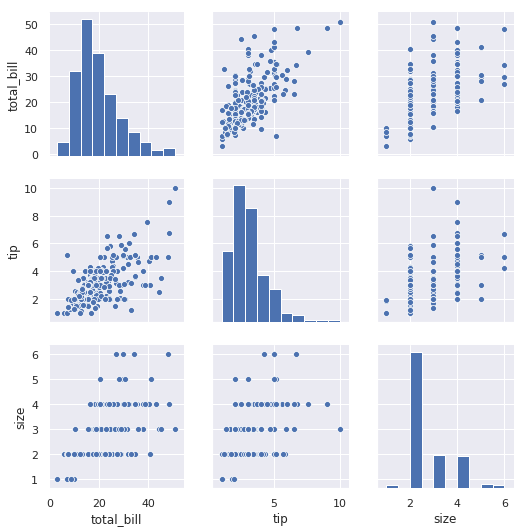

In [29]:
tips = sns.load_dataset('tips')
sns.pairplot(tips)
plt.show()


### Common Transformations

Here's how ebay's 2.3 million transactions look with a `log` transformation:

<img src = "images/ebay_log.png">

### Sensitivity Analysis

<img src = "images/ebay_ab_test.png">

### Robust Statistics

An entire field in Statistics. For example the Median is much more robust to extreme values than the mean:

<img src = "images/median_mean_simulation.gif">

### Tidy Data Philosophy

"Each variable is a column, each observation is a row, and each type of observational unit is a table." ([Hadley Wickham](http://vita.had.co.nz/papers/tidy-data.html))

Untidy (wide):

<img src = "images/untidy_data.png">

Tidy (long):

<img src = "images/tidy_data.png">

Though highly trendy, in many practical application tidy data may be just too long. But when feasible - go tidy.